# S2.02 - Exploration algorithmique d’un problème
## Amroune Akim : 30% - Antoine Thomas : 30% - Baurens-Torrente Valentin 30% - Sene Pablo 10%
___
### Partie 1 : Pablo, Akim, Thomas, Valentin
#### 1.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Fonction puissance iteree TP S2.02
def norme(X):
    """
    Calcule la norme d'un vecteur
        in: X [array int/float]
        
        out: [float]
    """
    total = 0
    for i in X:
        total += i**2
    return np.sqrt(total)

def puissance_iteree(A,s):
    """
    calcule la valeur propre et le vecteur propre
    d'une matrice adjacente selon un seuil
        in:	A [array of array int/float]
            s [float]
            
        out: Valeur propre [float], Vecteur propre [array float]
    """
    XN = np.ones(len(A)) / len(A)
    # Initialisation
    AXN = np.dot(A,XN)
    XN1 = (AXN / norme(AXN))
    
    while norme(XN1 - XN) > s: # Tant que la différence entre Xn et Xn+1 est au-dessus du seuil
        XN = XN1
        AXN = np.dot(A,XN)
        XN1 = AXN / norme(AXN)
    return norme(np.dot(A,XN)), XN # renvoie la Valeur propre et le Vecteur propres

# Teste des fonctions

C = np.array([
        [2,3,3],
        [1,0,3],
        [1,5,3]
    ])

Pc = puissance_iteree(C, 0.0000001)
print(Pc, "\n")
print(norme(np.dot(C,Pc[1]) - Pc[0] * Pc[1] ), "\n")

(6.8664001329586535, array([0.64423842, 0.38305367, 0.66198696])) 

5.89970747112982e-07 



L'algorithme de la puissance itérée permet de calculé le score de chaque pages car celui-ci revoie le vecteur propres de la matrice donnée qui correspond a la vecteur r, qui est le vecteur des scores de chaques pages.

#### 2.

In [17]:
# Reproduction de la matrice de la partie 1
A_partie1 = np.array([
    [0,1,1,1,1,1,0,0,0,0,0,0,0,0],
    [1,0,1,0,1,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,0,0,0,0,0],
    [1,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,0,0,0,1,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,1], 
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0]
])

# Reproduction de l'algorithme de la partie 1
def PageRank1(A):
    """
    Renvoie le score de chaque page d'apres une matrice d'adjacence selon le TP de la S2.02
        in: A [array of array int]
        
        out: Q [array of array float]
             R [Valeur propre [float], Vecteur propre [array float]]
    """
    C = A.T #Transposée de A
    
    # Calcul du degré entrant de chaque noeud
    Nj = np.zeros((len(C)),dtype=int)
    for i in range(len(C)):
        for j in range(len(C)):
            Nj[i] += C[j][i]
    
    # Calcule la matrice stochastique
    Q = np.where(Nj != 0, C / Nj,0)
    
    # Calcul de la puissance itérée
    R = puissance_iteree(Q, 1e-5)
    
    return Q, R

# Test de la fonction
Q1,R1 = PageRank1(A_partie1)
# Affichage des résultats
print("Score de chaque noeud :")
for i in range(0,len(R1[1])):
    print(i+1,":", R1[1][i])


print("Valeur propre (devrait se rapprocher de 1): ",R1[0]) # devrait être proche de 1
print("Verification (devrait se rapprocher de 0): ",norme(np.dot(Q1,R1[1]) - R1[0] * R1[1] ), "\n") # devrait être proche de 0

Score de chaque noeud :
1 : 0.4377007325597212
2 : 0.08754067724942365
3 : 0.11672114023607158
4 : 0.14590177879494587
5 : 0.1896727330643801
6 : 0.5252091640214921
7 : 0.17506778881552784
8 : 0.3501335047518601
9 : 0.17506778881552784
10 : 0.43770073255972114
11 : 0.08754067724942365
12 : 0.11672114023607158
13 : 0.14590177879494587
14 : 0.1896727330643801
Valeur propre (devrait se rapprocher de 1):  1.0000012541636143
Verification (devrait se rapprocher de 0):  7.965668085510968e-06 



#### 3.

En observant les résultats de la question précédente, nous observons premièrement que la valeur propre se rapproche de 1 au fur et à mesure que l'on diminue le seuil. Puis, lorsque l'on vérifie en effectuant le calcul : norme(Q * vecteur propre) - valeur propre * vecteur propre
Le résultat se rapproche de 0 selon le seuil donné à la fonction puissance_iteree(). Les résultats ayant les scores les plus élevés sont ceux qui ont le plus de liens entrants (1,10), ou ceux qui sont liés avec le plus de noeuds entrants et qui n'ont pas beaucoup d'arrêtes sortantes (6).

___
### Partie 2 : Akim, Thomas, Valentin
#### 1.

In [18]:
# Matrice adjacente de la partie 2
A_partie2 = np.array([
    [0,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,1,0],
    [1,1,0,0,0],
    [1,1,0,0,0]
])

# resultats de l'algorithme PageRank1 sur le graphe de la Partie 2
Q2,R2 = PageRank1(A_partie2)
print("Score de chaque noeud: ")
for i in range(0,len(R2[1])):
    print(i+1,":", R2[1][i])

print("Valeur propre (devrait se rapprocher de 1): ", R2[0]) # devrait être proche de 1
print("Verification (devrait se rapprocher de 0): ",norme(np.dot(Q2,R2[1]) - R2[0] * R2[1] ), "\n") # doit être proche de 0
print("r ≈ Qr selon la precision 10^-5:", np.all(np.dot(Q2,R2[1]) - R2[1] < 1e-5 )) # doit renvoyer True

Score de chaque noeud: 
1 : 1.0
2 : 0.0
3 : 0.0
4 : 0.0
5 : 0.0
Valeur propre (devrait se rapprocher de 1):  0.0
Verification (devrait se rapprocher de 0):  0.0 

r ≈ Qr selon la precision 10^-5: True


/tmp/ipykernel_12254/3209362330.py:37: RuntimeWarning: invalid value encountered in divide
  Q = np.where(Nj != 0, C / Nj,0)
/tmp/ipykernel_12254/4016768551.py:33: RuntimeWarning: invalid value encountered in divide
  XN1 = AXN / norme(AXN)


En appliquant l'algorithme de la Partie 1 au graphe de la Partie 2, on obtient dans le résultat une erreur dans la division. Cela s'explique par le fait qu'il y a des puits. Comme certains sommets ne renvoient rien, on ne peut pas retourner en arrière donc on obtient un mauvais résultat. C'est dire que chaque sommet représente des sites et que chaque arête représente des liens vers le site pointé par la flèche. Par exemple, le sommet 3 a une arête pointant vers 1 signifiant que le site 3 a un lien vers le site 1. Le site 3 n'a aucun lien vers lui.

#### 2.

In [19]:
# Fonction pour calculer la matrice de transition
def transition(Q, Nj, alpha):
    """
    Renvoie une matrice de transition de la matrice Q a l'aide de Nj et d'alpha
        in: Q [array of array int/float]
            Nj [array int]
            alpha [float]

        out: P [array of array float]
    """
    N = len(Q)
    P = np.where(Nj != 0, alpha * Q + (1-alpha)/N, 1/N)
    return P
        
def PageRank2(A, precision=1e-5, alpha=0.85):
    """
    Renvoie le score de chaque page d'apres une matrice d'adjacence selon la demande de la partie 2
        in: A [array of array int/float]
            precision=1-e5 [float]
            alpha=0.85 [float]
            
        out: Q [array of array float]
             R[Valeur propre [float], Vecteur propre [array float]]
    """
    C = A.T #Transposée de A
    
    # Calcul de la matrice des dégrés entrants
    Nj = np.zeros((len(C)),dtype=int)
    for i in range(len(C)):
        for j in range(len(C)):
            Nj[i] += C[j][i]
    
    # Calcul de la matrice Q pour calculer la matrice de transition
    Q = np.where(Nj != 0, C / Nj, 0)
    
    # Calcul de la matrice de transition
    P = transition(Q,Nj,alpha)
    
    # Calcul du score de chaque page avec la méthode de la puissance itérée
    R = puissance_iteree(P, precision)

    return P, R

# Resultats de l'algorithme PageRank2 sur le graphe de la Partie 2
P2, R2 = PageRank2(A_partie2)

# Affichage des résultats
print("Score de chaque page:")
for i in range(0,len(R2[1])):
    print(i+1,":", R2[1][i])

print("Valeur propre (devrait se rapprocher de 1):",R2[0]) # Devrait etre proche de 1
print("Verification (devrait se rapprocher de 0):",norme(np.dot(P2,R2[1]) - R2[0] * R2[1] )) # Devrait etre proche de 0
print("r ≈ Pr selon la precision 10^-5:", np.all(np.dot(P2,R2[1]) - R2[1] < 1e-5) ) # Devrait renvoyer True

Score de chaque page:
1 : 0.8258235206219151
2 : 0.40102176722437505
3 : 0.19748639949968277
4 : 0.2814165933721179
5 : 0.19748639949968277
Valeur propre (devrait se rapprocher de 1): 0.9999984239080435
Verification (devrait se rapprocher de 0): 3.1821457213328193e-06
r ≈ Pr selon la precision 10^-5: True


/tmp/ipykernel_12254/2768855204.py:34: RuntimeWarning: invalid value encountered in divide
  Q = np.where(Nj != 0, C / Nj, 0)


___
### Partie 3: Thomas, Valentin
#### 1.
Le critère d'arrêt dans l'algorithme de la puissance itérée à comme influence de définir le niveau de précision des résultats.
#### 2.
![Graphe de la partie 1 modifié](https://cdn.discordapp.com/attachments/1377310748862316718/1379802442056859758/Matrice.png?ex=6846d6a9&is=68458529&hm=7b9520e738fe1e6e26c0b18b7e7c2f3ea23026d1c5db3f9c013dd72604332cf2& "Graphe de la partie 1 modifié")

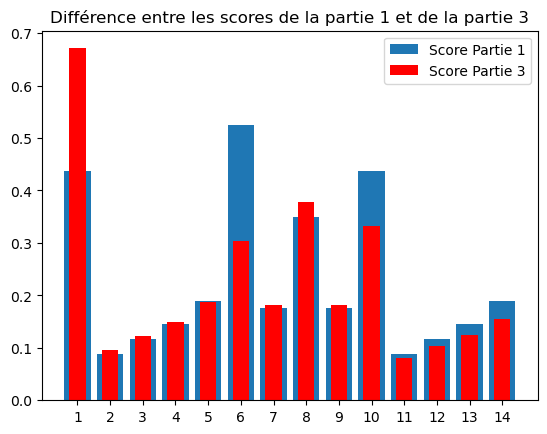

In [20]:
# Graphe de la partie 1 modifié pour avoir des hubs et des autorités
A_partie3 = np.array([
    [0,1,1,1,1,1,1,1,1,1,0,0,0,0],  # Hub: ajout de liens vers 7,8,9
    [1,0,1,0,1,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,0,0,0,0,0],
    [1,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,0,1,0,0,0,0,0,0,0,0],  # Modifié pour recevoir plus de liens
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0],
    [1,0,0,0,0,1,0,0,0,0,1,1,1,1],  # Hub existant
    [0,0,0,0,0,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,0,0,0,1,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,1], 
    [0,0,0,0,0,0,0,1,0,1,0,0,0,0]   # Autorité: reçoit des liens de 1,7,9
])

P3, R3 = PageRank2(A_partie3)

# Affichage des résultats à l'aide d'un graphique
N = [i for i in range(1,len(A_partie3)+1)]
plt.bar(N, R1[1], align='center')
plt.bar(N, R3[1], color='red', width=0.5)
plt.title("Différence entre les scores de la partie 1 et de la partie 3")
plt.legend(["Score Partie 1", "Score Partie 3"], loc="upper right")
plt.xticks(range(int(min(N)), int(max(N))+1, 1))
plt.show()

Dans la configuration du graphe de la partie 3, nous pouvons constater que les sommets **1**, **8**, **10** et **6** ont subis des **changements conséquents**. Par exemple, le score du sommet **1** (qui est un hub et une autorité) à considérablement **augmenté**. Au contraire, le score du sommet **6**, qui est un sommet normal, à largement **diminué**.
#### 3.

Dans le code suivant, nous allons essayer d'augmenter les valeurs de la page **11** et **14**. Pour cela nous allons essayer de relier des pages ayant des scores élevées aux points **11** et **14**.

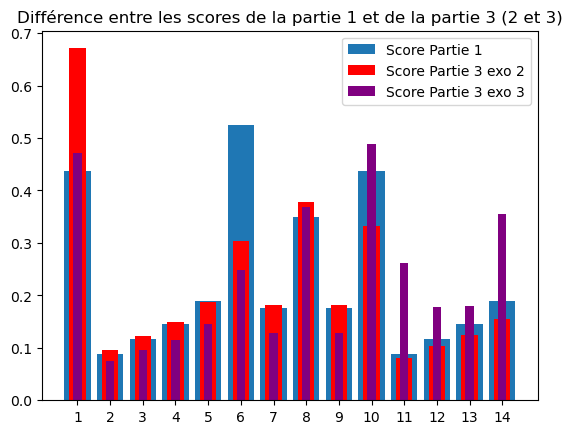

In [21]:
# Graphe de la partie 3 modifiée pour ajouté du score au point 11 et 14
A_partie3_3 = np.array([
    [0,1,1,1,1,1,1,1,1,1,0,0,0,1], # ajout d'un lien vers 14
    [1,0,1,0,1,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1], # ajout d'un lien vers 14
    [0,0,0,0,0,0,1,1,1,0,1,0,0,0], # ajout d'un lien vers 11
    [1,0,0,0,0,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,0,1,0,0,0,0,1,0,0,0], # ajout d'un lien vers 11
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0],
    [1,0,0,0,0,1,0,0,0,0,1,1,1,1],  
    [0,0,0,0,0,0,0,0,0,1,0,1,0,1],
    [0,0,0,0,0,0,0,0,0,1,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,1], 
    [0,0,0,0,0,0,0,1,0,1,0,0,0,0]   
])

P3_3, R3_3 = PageRank2(A_partie3_3)

# Affichage des resultats
plt.bar(N, R1[1], align='center')
plt.bar(N, R3[1], align='center', color='red',width=0.5)
plt.bar(N, R3_3[1], color='purple', width=0.25)
plt.title("Différence entre les scores de la partie 1 et de la partie 3 (2 et 3)")
plt.legend(["Score Partie 1", "Score Partie 3 exo 2" , "Score Partie 3 exo 3"], loc="upper right")
plt.xticks(range(int(min(N)), int(max(N))+1, 1))
plt.show()

#### 4.

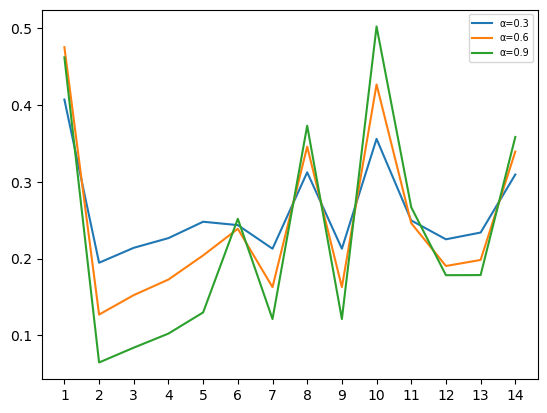

In [22]:
# Comparaison entre les résultats selon différents alpha
alpha = []
for i in range(3,10,3):
    P, R = PageRank2(A_partie3_3, alpha=i/10)
    alpha.append("α="+str(i/10))
    plt.plot(N, R[1])
plt.legend(alpha, loc="upper right", fontsize="x-small")
plt.xticks(range(int(min(N)), int(max(N))+1, 1))
plt.show()

À partir du schéma, nous pouvons conclure que l'influence qu'a le facteur d'amortissement sur la courbe est qu'il **uniformise** les scores lorsque ce facteur se **rapproche de 0**. Au contraire, quand ce facteur se **rapproche de 1**, on peut voir que la courbe est beaucoup **moins homogène**.

___
### Partie 4: Akim
#### 1.

##### Youtube
**Commande effectuée:**

./mat_adj_linux.out https://www.youtube.com/ 12 Partie4.YTB.12 


**Resultat obtenu:**

;extern;www.youtube.com;www.youtube.com/about;www.youtube.com/about/press;www.youtube.com/about/copyright;www.youtube.com/t/contact_us;www.youtube.com/creators;www.youtube.com/ads;www.youtube.com/t/terms;www.youtube.com/t/privacy;www.youtube.com/about/policies;www.youtube.com/howyoutubeworks?utm_campaign=ytgen&amp;utm_source=ythp&amp;utm_medium=LeftNav&amp;utm_content=txt&amp;u=https%3A%2F%2Fwww.youtube.com%2Fhowyoutubeworks%3Futm_source%3Dythp%26utm_medium%3DLeftNav%26utm_campaign%3Dytgen;www.youtube.com/new

extern;0;1;1;1;1;1;1;1;1;1;1;1;1

www.youtube.com;0;1;1;1;0;1;0;0;1;1;0;0;1

www.youtube.com/about;0;1;1;0;0;0;0;1;0;0;0;1;1

www.youtube.com/about/press;0;1;0;0;0;0;0;0;0;0;0;0;1

www.youtube.com/about/copyright;0;1;1;0;0;0;0;1;0;0;0;1;1

www.youtube.com/t/contact_us;0;1;0;0;0;0;0;0;0;0;0;0;1

www.youtube.com/creators;0;1;1;1;0;0;1;1;0;0;0;1;1

www.youtube.com/ads;0;1;1;1;0;0;0;1;0;0;0;1;1

www.youtube.com/t/terms;0;1;1;1;0;1;0;1;1;0;0;1;1

www.youtube.com/t/privacy;0;1;0;0;0;0;0;0;1;0;0;0;1

www.youtube.com/about/policies;0;1;1;0;0;0;0;1;0;0;0;1;1

www.youtube.com/howyoutubeworks?
utm_campaign=ytgen&amp;utm_source=ythp&amp;utm_medium=LeftNav&amp;utm_content=txt&amp;u=https%3A%2F%2Fwww.youtube.com%2Fhowyoutubeworks%3Fu
tm_source%3Dythp%26utm_medium%3DLeftNav%26utm_campaign%3Dytgen;0;1;0;0;0;0;0;0;0;0;0;0;1

www.youtube.com/new;0;1;0;0;0;0;0;0;0;0;0;0;1

In [23]:
# Matrice Youtube de profondeur 12
M_Youtube = np.array([
    [1,1,1,0,1,0,0,1,1,0,0,1],
    [1,1,0,0,0,0,1,0,0,0,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,1],
    [1,1,0,0,0,0,1,0,0,0,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,1],
    [1,1,1,0,0,1,1,0,0,0,1,1],
    [1,1,1,0,0,0,1,0,0,0,1,1],
    [1,1,1,0,1,0,1,1,0,0,1,1],
    [1,0,0,0,0,0,0,1,0,0,0,1],
    [1,1,0,0,0,0,1,0,0,0,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,1]
])

P_Y, R_Y = PageRank2(M_Youtube)
# Affichage des résultats
print("Score de chaque page:")
for i in range(0,len(R_Y[1])):
    print(i+1,":", R_Y[1][i])

print("Valeur propre:",R_Y[0]) # Devrait etre proche de 1
print("Verification:",norme(np.dot(P_Y,R_Y[1]) - R_Y[0] * R_Y[1] )) # Devrait etre proche de 0
print("r ≈ Pr selon la precision 10^-5:", np.all(np.dot(P_Y,R_Y[1]) - R_Y[1] < 1e-5) ) # Devrait renvoyer True

Score de chaque page:
1 : 0.6580207797782731
2 : 0.1868138771266886
3 : 0.14508469207748334
4 : 0.02932159786679146
5 : 0.12588597749764585
6 : 0.033374239534948724
7 : 0.10691412546223773
8 : 0.15683468736070308
9 : 0.10922134953124231
10 : 0.02932159786679146
11 : 0.10691412546223773
12 : 0.6580207797782731
Valeur propre: 0.9999994462648752
Verification: 5.211070651055154e-06
r ≈ Pr selon la precision 10^-5: True


##### FaceBook

**Commande effectuée:**

./mat_adj_linux.out https://www.facebook.com/ 16 Partie4.FBK.16 

**Resultat obtenu:**

;extern;www.facebook.com;www.facebook.com/recover/initiate?privacy_mutation_token=eyJ0eXBlIjowLCJjcmVhdGlvbl90aW1lIjoxNzQ5MTIzNTEyLCJjYWxsc2l0ZV9pZCI6MzgxMjI5MDc5NTc1OTQ2fQ%3D%3D&amp;ars=facebook_login&amp;next;www.facebook.com/r.php?entry_point=login;www.facebook.com/pages/create?ref_type=registration_form;www.facebook.com/reg;www.facebook.com/login;www.facebook.com/lite;www.facebook.com/watch;www.facebook.com/votinginformationcenter?entry_point=c2l0ZQ%3D%3D;www.facebook.com/privacy/policy?entry_point=facebook_page_footer;www.facebook.com/privacy/center?entry_point=facebook_page_footer;www.facebook.com/help/cancelcontracts?source=facebook.com;www.facebook.com/ad_campaign/landing.php?placement=pflo&amp;campaign_id=402047449186&amp;nav_source=unknown&amp;extra_1=auto;www.facebook.com/pages/create?ref_type=site_footer;www.facebook.com/careers?ref=pf;www.facebook.com/policies/cookies


extern;0;1;1;1;1;1;1;1;0;0;0;1;0;1;1;1;0

www.facebook.com;0;0;0;0;1;0;0;0;0;0;0;0;0;0;1;1;0

www.facebook.com/recover/initiate?
privacy_mutation_token=eyJ0eXBlIjowLCJjcmVhdGlvbl90aW1lIjoxNzQ5MTIzNTEyLCJjYWxsc2l0ZV9pZCI6MzgxMjI5MDc5NTc1OTQ2fQ%3D%3D&amp;ars=facebook_lo
gin&amp;next;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0

www.facebook.com/r.php?entry_point=login;0;1;0;1;0;0;0;0;0;0;0;0;0;1;0;0;0

www.facebook.com/pages/create?ref_type=registration_form;0;1;0;1;0;1;0;0;0;0;0;0;0;1;0;0;0

www.facebook.com/reg;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/login;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/lite;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/watch;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/votinginformationcenter?entry_point=c2l0ZQ%3D%3D;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/privacy/policy?entry_point=facebook_page_footer;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/privacy/center?entry_point=facebook_page_footer;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/help/cancelcontracts?source=facebook.com;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/ad_campaign/landing.php?
placement=pflo&amp;campaign_id=402047449186&amp;nav_source=unknown&amp;extra_1=auto;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/pages/create?ref_type=site_footer;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/careers?ref=pf;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

www.facebook.com/policies/cookies;0;1;1;1;0;1;1;1;0;0;0;0;0;1;0;0;0

In [24]:
#Matrice Facebook profondeur 16

M_Facebook = np.array([
	[0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0],
	[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
	[1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0],
	[1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0]    
])

P_F, R_F = PageRank2(M_Facebook)
# Affichage des résultats
print("Score de chaque page:")
for i in range(0,len(R_F[1])):
    print(i+1,":", R_F[1][i])

print("Valeur propre:",R_F[0]) # Devrait etre proche de 1
print("Verification:",norme(np.dot(P_F,R_F[1]) - R_F[0] * R_F[1] )) # Devrait etre proche de 0
print("r ≈ Pr selon la precision 10^-5:", np.all(np.dot(P_F,R_F[1]) - R_F[1] < 1e-5) ) # Devrait renvoyer True

Score de chaque page:
1 : 0.5850465277477876
2 : 0.23483517945708465
3 : 0.3854297399776196
4 : 0.1947785514960369
5 : 0.2762209288856836
6 : 0.23483517945708465
7 : 0.23483517945708465
8 : 0.02901623969650406
9 : 0.02901623969650406
10 : 0.02901623969650406
11 : 0.02901623969650406
12 : 0.02901623969650406
13 : 0.3854297399776196
14 : 0.1947785514960369
15 : 0.1947785514960369
16 : 0.02901623969650406
Valeur propre: 0.9999979821538282
Verification: 7.613165319712452e-06
r ≈ Pr selon la precision 10^-5: True


##### Linked in
**Commande effectuée:**

./mat_adj_linux.out https://www.linkedin.com/ 20 Partie4.LKD.20

**Resultat obtenu:**

;extern;www.linkedin.com;www.linkedin.com/legal/cookie-policy;www.linkedin.com/mypreferences/g/guest-cookies;www.linkedin.com/legal/user-agreement?trk=linkedin-tc_auth-button_user-agreement;www.linkedin.com/legal/privacy-policy?trk=linkedin-tc_auth-button_privacy-policy;www.linkedin.com/legal/cookie-policy?trk=linkedin-tc_auth-button_cookie-policy;www.linkedin.com?trk=guest_homepage-basic_nav-header-logo;www.linkedin.com/pulse/topics/home?trk=guest_homepage-basic_guest_nav_menu_articles;www.linkedin.com/pub/dir/+/+?trk=guest_homepage-basic_guest_nav_menu_people;www.linkedin.com/learning/search?trk=guest_homepage-basic_guest_nav_menu_learning;www.linkedin.com/jobs/search?trk=guest_homepage-basic_guest_nav_menu_jobs;www.linkedin.com/games?trk=guest_homepage-basic_guest_nav_menu_games;www.linkedin.com/signup?trk=guest_homepage-basic_nav-header-join;www.linkedin.com/login?fromSignIn=true&amp;trk=guest_homepage-basic_nav-header-signin;www.linkedin.com/login;www.linkedin.com/signup;www.linkedin.com/pulse/topics/marketing-s2461;www.linkedin.com/pulse/topics/public-
administration-s3697;www.linkedin.com/pulse/topics/healthcare-s282;www.linkedin.com/pulse/topics/engineering-s166

extern;0;1;1;0;1;1;1;1;1;0;1;1;1;1;0;0;1;1;1;1;1

www.linkedin.com;0;0;0;1;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0;0;0

www.linkedin.com/legal/cookie-policy;0;1;1;0;1;1;1;1;1;0;1;1;0;1;1;1;1;1;1;1;1

www.linkedin.com/mypreferences/g/guest-cookies;0;1;1;0;1;1;1;1;1;0;1;1;0;1;1;1;1;1;1;1;1

www.linkedin.com/legal/user-agreement?trk=linkedin-tc_auth-button_user-agreement;0;1;0;0;0;0;0;1;1;0;0;1;0;0;0;0;0;1;1;1;1

www.linkedin.com/legal/privacy-policy?trk=linkedin-tc_auth-button_privacy-policy;0;1;0;0;0;0;0;1;1;0;0;1;0;0;0;0;0;1;1;1;1

www.linkedin.com/legal/cookie-policy?trk=linkedin-tc_auth-button_cookie-policy;0;1;0;0;0;0;0;1;1;0;0;1;0;0;0;0;0;1;1;1;1

www.linkedin.com?trk=guest_homepage-basic_nav-header-logo;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/pulse/topics/home?trk=guest_homepage-basic_guest_nav_menu_articles;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/pub/dir/+/+?trk=guest_homepage-basic_guest_nav_menu_people;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/learning/search?trk=guest_homepage-basic_guest_nav_menu_learning;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/jobs/search?trk=guest_homepage-basic_guest_nav_menu_jobs;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/games?trk=guest_homepage-basic_guest_nav_menu_games;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/signup?trk=guest_homepage-basic_nav-header-join;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/login?fromSignIn=true&amp;trk=guest_homepage-basic_nav-header-signin;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/login;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/signup;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/pulse/topics/marketing-s2461;0;1;0;0;0;0;0;1;1;0;0;0;0;0;0;0;0;1;0;0;0

www.linkedin.com/pulse/topics/public-administration-s3697;0;1;0;0;0;0;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0

www.linkedin.com/pulse/topics/healthcare-s282;0;1;0;0;0;0;0;1;1;0;0;0;0;0;0;0;0;0;0;1;0

www.linkedin.com/pulse/topics/engineering-s166;0;1;0;0;0;0;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0


In [25]:
#Matrice Linked In profondeur 20
M_Linked = np.array([       
   [0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0],
   [1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1],
   [1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1],
   [1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1],
   [1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1],
   [1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0],
   [1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
   [1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0],
   [1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0] 
])

P_L, R_L = PageRank2(M_Linked)
# Affichage des résultats
print("Score de chaque page:")
for i in range(0,len(R_L[1])):
    print(i+1,":", R_L[1][i])

print("Valeur propre:",R_L[0]) # Devrait etre proche de 1
print("Verification:",norme(np.dot(P_L,R_L[1]) - R_L[0] * R_L[1] )) # Devrait etre proche de 0
print("r ≈ Pr  selon la precision 10^-5:", np.all(np.dot(P_L,R_L[1]) - R_L[1] < 1e-5 )) # Devrait renvoyer True

Score de chaque page:
1 : 0.6492554509630711
2 : 0.030272464152899272
3 : 0.20258989224561894
4 : 0.030272464152899272
5 : 0.030272464152899272
6 : 0.030272464152899272
7 : 0.6492554509630711
8 : 0.08408667147503691
9 : 0.018629814203338688
10 : 0.030272464152899272
11 : 0.03992225961193744
12 : 0.018629814203338688
13 : 0.030272464152899272
14 : 0.21423254219517954
15 : 0.21423254219517954
16 : 0.030272464152899272
17 : 0.050694510380941256
18 : 0.03992225961193744
19 : 0.050694510380941256
20 : 0.03992225961193744
Valeur propre: 1.0000009404134382
Verification: 8.54776213750956e-06
r ≈ Pr  selon la precision 10^-5: True


#### 2.
##### 413 avenue Gaston Berger, Aix en Provence, France

In [26]:
M_Gaston = np.load("Donnees_carte/413 avenue Gaston Berger, Aix en Provence, France_Matrice.npy")
Noeuds_Gaston = np.load("Donnees_carte/413 avenue Gaston Berger, Aix en Provence, France_Id_Noeud.npy")

P_Gaston, R_Gaston = PageRank2(M_Gaston, precision=1e-15)

# Affichage des scores de chaque page dans l'ordre décroissant
indices_trie = np.argsort(R_Gaston[1])[::-1]
print("Score de chaque page (ordre décroissant):")
for idx in indices_trie:
    print(Noeuds_Gaston[idx], ":", R_Gaston[1][idx])

print("Valeur propre:",R_Gaston[0]) # Devrait etre proche de 1
print("Verification:",norme(np.dot(P_Gaston,R_Gaston[1]) - R_Gaston[0] * R_Gaston[1] )) # Devrait etre proche de 0
print("r ≈ Pr selon la precision 10^-15:", np.all(np.dot(P_Gaston, R_Gaston[1]) - R_Gaston[1] < 1e-15)) # Devrait renvoyer True

Score de chaque page (ordre décroissant):
5672603788 : 0.06955944207057198
9196449217 : 0.06544117208085855
7251343585 : 0.06467041132181559
33706402 : 0.06322228432346774
1840330051 : 0.06251632737670879
7304213674 : 0.0611077987454923
1840330044 : 0.06058461749417683
34550845 : 0.059233379097582514
33707108 : 0.05778849558421927
302864793 : 0.056960282151486984
4836722465 : 0.05641713681437836
304010763 : 0.05503593826225058
5323321826 : 0.054890500523345806
34552857 : 0.054094389700793145
1837997824 : 0.05376521898074285
12162239 : 0.05370213837581196
310848784 : 0.053654107085447905
279038214 : 0.0536464029881243
303994494 : 0.05359317221458769
1839699583 : 0.052915885974169685
305698272 : 0.05210962843521093
34506180 : 0.0500148434106092
5661391308 : 0.04961127394539573
302865268 : 0.049524608716658314
34302867 : 0.04952225019790188
5239402441 : 0.04905165955773759
330950460 : 0.048949650123032776
267871457 : 0.04891573637359016
12158996 : 0.04884037077389264
1792964980 : 0.048700

/tmp/ipykernel_12254/2768855204.py:34: RuntimeWarning: invalid value encountered in divide
  Q = np.where(Nj != 0, C / Nj, 0)


Les résultats lors du script précédent montrent que les **10 premiers noeuds** ayant le **score le plus élevé** sont généralement des **intersections**. Nous pouvons aussi observer que les **scores** des noeuds sont **faibles** du à la présence de nombreux noeuds dans cette matrice. 

##### Lille, France

In [27]:
M_Lille = np.load("Donnees_carte/Lille, France_Matrice.npy")
Noeuds_Lille = np.load("Donnees_carte/Lille, France_Id_Noeud.npy")
P_Lille, R_Lille = PageRank2(M_Lille, precision=1e-15)

# Affichage des scores de chaque page dans l'ordre décroissant
indices_trie = np.argsort(R_Lille[1])[::-1]
print("Score de chaque page (ordre décroissant):")
for idx in indices_trie:
    print(Noeuds_Lille[idx], ":", R_Lille[1][idx])

print("Valeur propre:",R_Lille[0]) # Devrait etre proche de 1
print("Verification:",norme(np.dot(P_Lille,R_Lille[1]) - R_Lille[0] * R_Lille[1] )) # Devrait etre proche de 0
print("r ≈ Pr selon la precision 10^-15:", np.all(np.dot(P_Lille,R_Lille[1]) - R_Lille[1] < 1e-15) ) # Devrait renvoyer True

/tmp/ipykernel_12254/2768855204.py:34: RuntimeWarning: invalid value encountered in divide
  Q = np.where(Nj != 0, C / Nj, 0)


Score de chaque page (ordre décroissant):
251053675 : 0.07215914726148843
1007200366 : 0.06334015503054577
149374913 : 0.06185312070539822
508063548 : 0.05811706506392407
1007200343 : 0.05718658091998441
164480275 : 0.05708787463186551
489576842 : 0.05580746589743041
260579141 : 0.05551464442583751
260579144 : 0.05301560407511971
1773320692 : 0.0529037213211877
954557691 : 0.05220797379696955
6278931430 : 0.05189609572364706
6315125559 : 0.05187324394110055
243072270 : 0.05186073250982034
489576845 : 0.05150092222776613
8567356535 : 0.05105574233994245
254492198 : 0.050664536625348304
2973207618 : 0.05008013777110598
440740817 : 0.04979894813458819
3077093043 : 0.049789421397773787
1331116340 : 0.04963549099186694
494053168 : 0.04901859402759634
225057604 : 0.04898701716422951
1299481293 : 0.04767926048529217
251055141 : 0.04751053339702724
1796170325 : 0.04659521279959368
506803405 : 0.046342025289593025
6278930544 : 0.04629931141174542
492204154 : 0.045895115904628116
290265534 : 0.0

Les résultats lors du script précédent montrent encore que les 10 premiers points sont généralement des **intersections** mais généralement placés vers le **centre-ville**. Contrairement à ceux **moins élevés** qui sont généralement des **coins de rue** loin du centre.

___
### Partie 5: Akim, Thomas, Valentin
#### 1.

Fonction PageRank3(P : Matrice de transition):

Debut

    declarer N entier naturel <- Taille de A;

    declarer I array de array de float de taille N <- Matrice identité de taille N;

    declarer M array de array de float <- I - P;

    transformer la derniere ligne de M en 1;
    
    declarer b array de float de taille N;
    
    pour i variant de 0 a N - 2:
    
    Faire
    
        b[i] = 0;
    Ffaire
    
    b[N-1] = 1;
    
    declarer R array de float de taille N <- resultats de l'equation entre M et b;
    
    retourner R

Fin   

##### 2.

In [28]:
def PageRank3(A, alpha=0.85):
    
    C = A.T #Transposée de A
    
    # Calcul de la matrice des degrés entrants
    Nj = np.zeros((len(C)),dtype=int)
    for i in range(len(C)):
        for j in range(len(C)):
            Nj[i] += C[j][i]
    
    # Calcul de la matrice stochastique Q pour calculer la matrice de transition
    Q = np.where(Nj != 0, C / Nj, 0)

    # Calcul de la matrice de transition
    P = transition(Q, Nj, alpha)

    # Nouvelle partie de l'algorithme qui remplace la puissance itérée
    N = len(P)
    I = np.identity(N) # Construit une matrice identité de longueur N
    M = I - P # Transforme P en systeme linéaire
    M[-1,:] = 1 # remplie la derniere ligne de 1 pour avoir une solution unique
    b = [0 for i in range(0,N-1)]
    b.append(1) # Adapte le systeme a M
    R = np.linalg.solve(M,np.array(b)) # Résout l'équation pour trouver le résultat
    return R

#### 3.

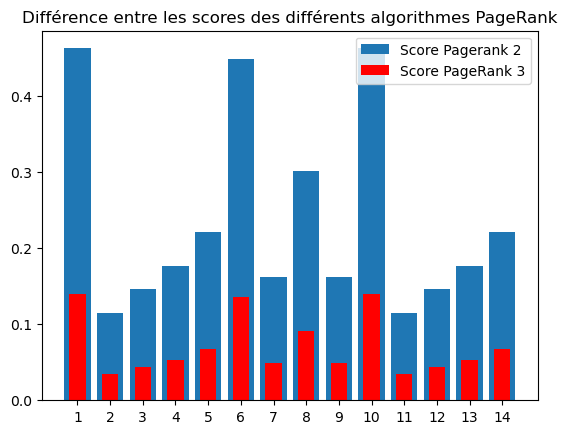

Score de chaque page (ordre décroissant):
1 : PageRank 2: 0.46211056656588856 , PageRank 3: 0.13944660136788722
10 : PageRank 2: 0.46211056656588856 , PageRank 3: 0.13944660136788703
6 : PageRank 2: 0.4481069989931836 , PageRank 3: 0.1352208812776703
8 : PageRank 2: 0.30056876724575576 , PageRank 3: 0.09069970717447408
5 : PageRank 2: 0.22130106227339558 , PageRank 3: 0.06677986448666966
14 : PageRank 2: 0.2213010622733956 , PageRank 3: 0.06677986448666948
4 : PageRank 2: 0.1762775665298329 , PageRank 3: 0.05319356303115822
13 : PageRank 2: 0.1762775665298329 , PageRank 3: 0.05319356303115814
7 : PageRank 2: 0.16246960391662485 , PageRank 3: 0.04902686874295897
9 : PageRank 2: 0.16246960391662485 , PageRank 3: 0.049026868742958966
3 : PageRank 2: 0.14638309649821654 , PageRank 3: 0.04417260019842738
12 : PageRank 2: 0.14638309649821654 , PageRank 3: 0.04417260019842735
2 : PageRank 2: 0.1140647505180908 , PageRank 3: 0.03442020794682664
11 : PageRank 2: 0.1140647505180908 , PageRank 3:

In [29]:
# Résultats des algorithmes PageRank2 et PageRank3
PR2 = PageRank2(A_partie1, precision=1e-15)[1][1]
PR3 = PageRank3(A_partie1)

# Comparaison des résultats à l'aide d'un graphique
N = [i for i in range(1,len(PR3)+1)]
plt.bar(N, PR2)
plt.bar(N, PR3, color='red', align='center', width=0.5)
plt.title("Différence entre les scores des différents algorithmes PageRank")
plt.legend(["Score Pagerank 2" , "Score PageRank 3"], loc="upper right")
plt.xticks(range(int(min(N)), int(max(N))+1, 1))
plt.show()

# Affiche les scores des noeuds dans l'ordre décroissant pour observer si il y a des différence de rang.
indices_trie = np.argsort(PR3)[::-1]
print("Score de chaque page (ordre décroissant):")
for idx in indices_trie:
    print(N[idx],": PageRank 2:", PR2[idx],", PageRank 3:", PR3[idx])

Si l'on compare les résultat de tous les algorithmes de PageRank, on observe que l'algorithme PageRank 3 a des résultats beaucoup plus faibles que le PageRank 2, mais pour autant, il semble garder les même proportinalités que celui-ci, car les scores de chaque noeud dans l'ordre décroissant sont rangés dans le même ordre que dans le PageRank 2, mais en plus précis. Ex: dans le PageRank 2, les points 1 et 10 sont égaux, alors que dans le PageRank 3, le noeud 1 est à peine plus grand que le noeud 10.

#### 4.

In [30]:
# Teste le temps des 2 algorithmes
import time as t
debut = t.time()
PageRank2(M_Gaston,1e-15)
fin = t.time()
print("L'algorithme PageRank2 avec une precision de 1e-15 a mit ",fin - debut, " seconde(s) sur la matrice de Gaston Berger")

debut = t.time()
PageRank3(M_Gaston)
fin = t.time()
print("L'algorithme PageRank3 a mit ",fin - debut, " seconde(s) sur la matrice de Gaston Berger")

/tmp/ipykernel_12254/2768855204.py:34: RuntimeWarning: invalid value encountered in divide
  Q = np.where(Nj != 0, C / Nj, 0)


L'algorithme PageRank2 avec une precision de 1e-15 a mit  1.0600082874298096  seconde(s) sur la matrice de Gaston Berger
L'algorithme PageRank3 a mit  0.8283693790435791  seconde(s) sur la matrice de Gaston Berger


/tmp/ipykernel_12254/2679344711.py:12: RuntimeWarning: invalid value encountered in divide
  Q = np.where(Nj != 0, C / Nj, 0)


En observant les temps d'exécution des 2 algorithmes, on observe que le PageRank2 est plus lent que l'algorithme PageRank3. Mais ceci depend aussi de la précision donnée à l'algorithme PageRank 2. Dans le cas de l'exemple au dessus, la précision de PageRank2 est de 1e-15, ce qui est le plus petit possible avant que l'algorithme ne fonctionne plus (limitation du type float). Mais regardons maintenant la complexité de chaque algorithme:
- **PageRank2** a une *complexité* de **O(nb d'arretes * nb iteration)** car chaque itération nécessite une multiplication matrice-vecteur en O(nb d'arretes), répétée par le nombre d'itération.

- **PageRank3** a une *complexité* de **O(N³)** où N est la taille de la matrice d'après [cette source](https://stackoverflow.com/questions/12660052/time-complexity-of-scipy-linalg-solve-lapack-gesv-on-large-matrix), car l'algorithme utilise la fonction np.linalg.solve() qui a cette complexité.

En regardant ces complexités, on peut en déduire que le **PageRank 3** est mieux pour les matrices avec **des petits N**, tandis que **PageRank2** est meilleur pour les matrice ayant **peu d'arrêtes**.